# Introduction
I tried to find the best neighborhoods in Pittsburgh based on Traffic Consistency. Inconsistent traffic flow is a major risk factor that leads to collisions and reduced pedestrian comfort and safety. My goal is to identify neighborhoods where the those who drive through it drive the most consistent to one another.

To measure stability, I used a traffic dataset to calculate the **Top 50% Speed Spread** for each road segment. This metric measures the difference between the **85th Percentile Speed** (the speed of the fast drivers) and the **50th Percentile Speed** (the speed of the average driver).

### The core metric is the **Average Speed Spread Score**:
- A low score means the 85th percentile drivers are close to the median drivers, showing high consistency and predictable flow (safest/best).
- A high score means the fast drivers are much faster than the average drivers, showing low consistency and unstable flow (riskiest/worst).

### This notebook walks through the steps I used to:
- Load the traffic dataset.
- Calculate the Top 50% Speed Spread for each road segment.
- Aggregate the average spread score for each neighborhood.
- Identify the most stable and most inconsistent neighborhoods.

BEST 5 NEIGHBORHOODS
                           avg_speed_consistency
neighborhood                                    
Friendship                              1.000000
Upper Hill                              3.066667
Central Northside                       3.666667
Central Business District               4.000000
Crafton Heights                         4.000000

WORST 5 NEIGHBORHOODS
                          avg_speed_consistency
neighborhood                                   
Brighton Heights                       5.666667
Bluff                                  5.666667
Beltzhoover                            6.000000
Strip District                         6.333333
Lincoln-Lemington-Belmar               6.500000


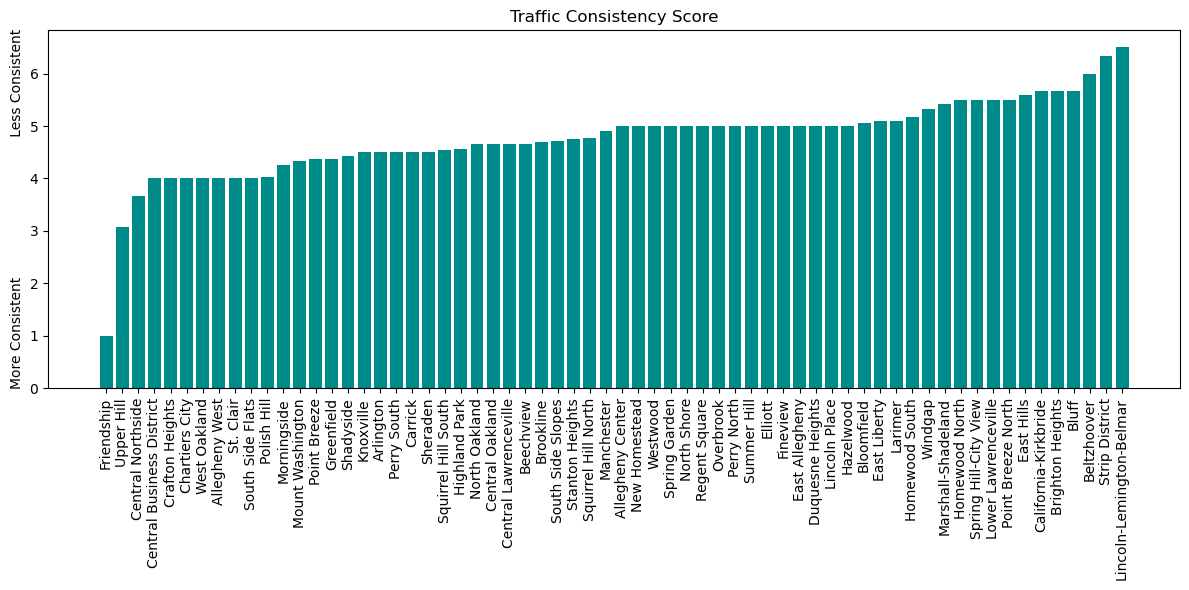

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("traffic.csv")

# Find difference between 85% and 50%
df['top_50_spread'] = df['speed85_percent'] - df['median_speed']

neighborhood_metrics = df.groupby('neighborhood').agg({
    'top_50_spread': 'mean' 
}).rename(columns={
    'top_50_spread': 'avg_speed_consistency' # Lower score means more consistent
})

neighborhood_metrics = neighborhood_metrics.dropna()

plot_data = neighborhood_metrics.sort_values('avg_speed_consistency', ascending=True)

print("BEST 5 NEIGHBORHOODS")
print(plot_data.head(5))

print("\nWORST 5 NEIGHBORHOODS")
print(plot_data.tail(5))

plt.figure(figsize=(12,6))
plt.bar(plot_data.index, plot_data['avg_speed_consistency'], color='darkcyan')
plt.xticks(rotation=90)
plt.ylabel('More Consistent                                Less Consistent')
plt.title('Traffic Consistency Score')
plt.tight_layout()
plt.show()

# Conclusion
Traffic flow is most stable and safe in **Friendship** ($1.00$) and **Upper Hill** ($3.07$) because the 50th and 85th percentiles are really close, so everyone drives around the same speed.

**Lincoln-Lemington-Belmar** ($6.50$) and **Strip District** ($6.33$) are the worst because the fast drivers are way faster than the average drivers, making the traffic totally inconsistent and risky.